In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima_model import ARMA

It is not necessarily wrong to import ARMA from statsmodels.tsa.arima_model if you only intend to fit an ARMA model (without the integration component).

ARMA is a subclass of ARIMA that allows you to fit an autoregressive moving average (ARMA) model to the data, without including the differencing component. The ARMA model is a special case of the ARIMA model where the integration order d is set to zero.

However, if you plan to fit an ARIMA model that includes the integration component, you should import ARIMA instead of ARMA.

It is worth noting that in recent versions of statsmodels, ARMA has been deprecated and is no longer recommended for use. Instead, it is recommended to use ARIMA with d=0 to fit an ARMA model.

In [3]:
df= pd.read_csv('/kaggle/input/nifty50-stock-market-data/HCLTECH.csv')

In [4]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5295,2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.0,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
5296,2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.3,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
5297,2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.9,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
5298,2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.3,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706
5299,2021-04-30,HCLTECH,EQ,909.55,905.0,915.00,895.40,900.1,898.95,904.98,10921664,9.883911e+14,465056.0,6189272.0,0.5667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [7]:
hcl=df.dropna()

In [8]:
#Set datetime as dataframe index
hcl.index=pd.to_datetime(hcl.Date)

In [9]:
# We had to select any 1 column out of all columns listed here
hcl = hcl['Prev Close']['2013-01-01':'2014-01-01']

This code line is indexing a pandas DataFrame hcl to select a subset of data between the dates '2013-01-01' and '2014-01-01' from the 'Prev Close' column.

hcl is a pandas DataFrame containing financial data, it is likely that the 'Prev Close' column represents the previous day's closing price of a stock.

The syntax hcl['Prev Close'] selects the 'Prev Close' column from the hcl DataFrame, and the syntax ['2013-01-01':'2014-01-01'] specifies the time range of interest, including both the start and end dates.

Therefore, the resulting DataFrame hcl contains only the rows corresponding to the specified time range and the 'Prev Close' column.

In [10]:
hcl.head()

Date
2013-01-01    618.70
2013-01-02    622.15
2013-01-03    625.25
2013-01-04    625.95
2013-01-07    634.05
Name: Prev Close, dtype: float64

In [11]:
hcl.describe()

count     251.000000
mean      880.975100
std       176.845846
min       618.700000
25%       741.100000
50%       795.000000
75%      1062.400000
max      1262.550000
Name: Prev Close, dtype: float64

<AxesSubplot:xlabel='Date'>

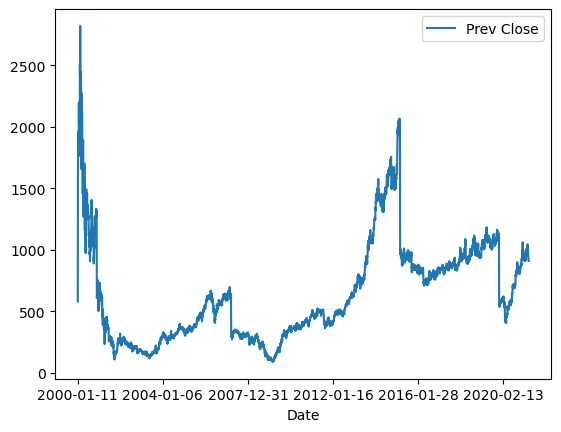

In [12]:
#Alternative to matplotlib plot, this is pandas plot
df.plot(x='Date',y='Prev Close')

<AxesSubplot:xlabel='Date'>

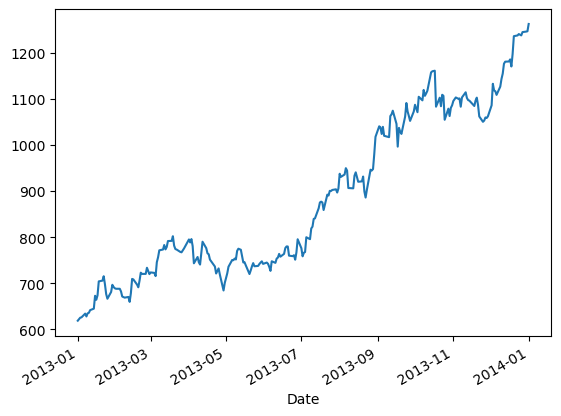

In [13]:
hcl.plot(x='Date',y='Prev Close')

In [14]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(hcl, autolag='AIC')


This snippet of code is using the Augmented Dickey-Fuller (ADF) test to check whether a time series is stationary. The ADF test is a type of unit root test.

1. `from statsmodels.tsa.stattools import adfuller`: This line is importing the `adfuller` function from the `statsmodels` library. `statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models.

2. `adfuller_result = adfuller(hcl, autolag='AIC')`: This line is applying the ADF test to the time series `hcl`. The `autolag='AIC'` argument tells the function to automatically determine the lag length that minimizes the Akaike Information Criterion (AIC). The ADF test checks whether a unit root is present in the time series sample. If it is, the time series is non-stationary. 

3. `adfuller_result[1]`: The `adfuller` function returns a tuple where the second element (index 1) is the p-value of the test. 

The null hypothesis of the ADF test is that the time series is non-stationary (has a unit root). So, if the p-value is less than a given significance level (like 0.05), you would reject the null hypothesis and infer that the time series is stationary.

On the other hand, if the p-value is greater than your chosen significance level, you fail to reject the null hypothesis and you would infer that your time series is non-stationary. In this case, you might need to apply some transformations (like differencing, or rolling mean differencing as you mentioned earlier) to make your series stationary.

In [15]:
#Non stationary
#p-value calculation:
adfuller_result[1]

0.9647726356748966

<AxesSubplot:xlabel='Date'>

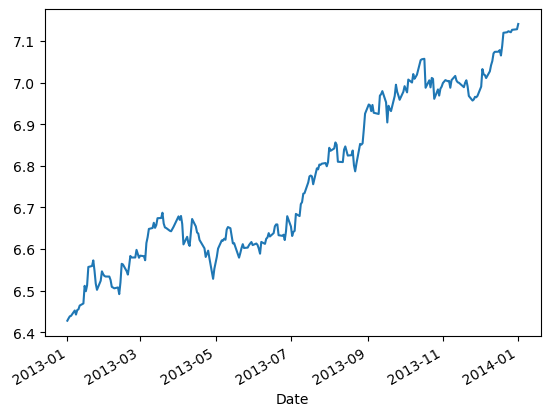

In [16]:
#By taking log, we tried to make data stationary, but it didn't happen
ts_log=np.log(hcl)
ts_log.plot()

<AxesSubplot:xlabel='Date'>

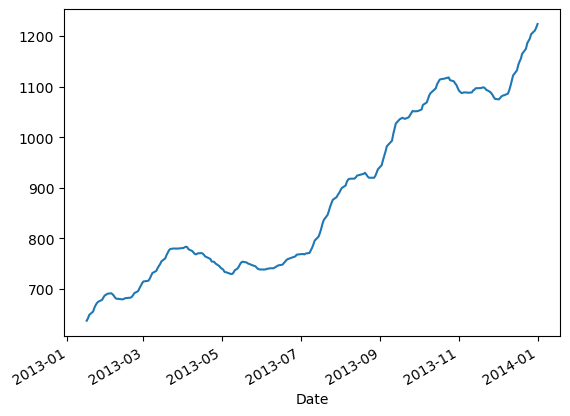

In [17]:
#Demonstrating Rolling Mean over TS data to smoothen TS
rollmean=hcl.rolling(12).mean()
rollmean.plot()

The lines of code you posted are applying a rolling mean to a pandas DataFrame or Series, and then plotting the result. Here's a breakdown:

1. `rollmean=hcl.rolling(12).mean()`: This line of code computes the rolling mean (also known as moving average) over a window of 12 periods for the `hcl` pandas DataFrame or Series.

    - `hcl.rolling(12)`: The `rolling()` function specifies a rolling window, which in this case is set to 12. This means that for each point in `hcl`, it considers the current point and the 11 preceding points (totaling 12 points).
    
    - `.mean()`: This function calculates the mean (average) value of these 12 points. It does this for every possible 12-point window in the DataFrame or Series, thus giving a new series of means which "roll" along the original data.

The result, `rollmean`, is a new pandas Series where each point is the average of the corresponding 12-point window in `hcl`.

2. `rollmean.plot()`: This line of code generates a line plot of the `rollmean` Series using pandas' built-in plotting capabilities. The x-axis represents the index of the DataFrame or Series (usually time in the case of time series data), and the y-axis represents the calculated rolling mean values.

This process is often used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. The width of the window should be chosen relevant to the specific context. In this case, a window of 12 is chosen, which might suggest that the data has annual seasonality if the data points are monthly.

<AxesSubplot:xlabel='Date'>

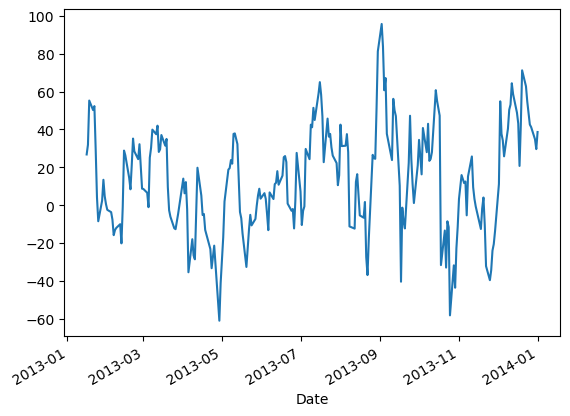

In [18]:
#Rolling Mean Differencing to bring stationarity
diff = hcl - rollmean
diff.plot()

In this code snippet, a common technique is being applied to make a time series stationary by removing trend or seasonality. This is known as rolling mean differencing. Here's what each line is doing:

1. `diff = hcl - rollmean`: This line is creating a new time series where each value is the difference between the original time series (`hcl`) and the rolling mean (`rollmean`). This can help to remove trend from the data, as each value now represents the deviation from a recent mean, rather than an absolute value.

2. `diff.plot()`: This line is plotting the new time series (`diff`). If the original time series had a trend, the plot of `diff` should look more stationary (i.e., have a more constant mean and variance over time).

It's important to note that this method assumes the trend is approximately constant over each window. If this isn't the case (for example, if the trend is rapidly increasing or decreasing), this method may not fully remove the trend.

Also, after applying this transformation, you should typically check whether the new series is indeed stationary, usually by using a statistical test like the Augmented Dickey-Fuller test. If the series is still not stationary, you may need to apply additional transformations, such as differencing or log transformation.

<AxesSubplot:xlabel='Date'>

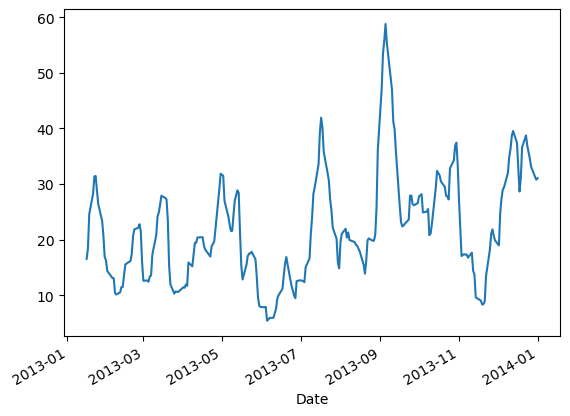

In [19]:
# Checking whether hcl TS is stationary via rolling_std deviation plot
rollstd = hcl.rolling(12).std()
rollstd.plot()

The line `rollstd = hcl.rolling(12).std()` is calculating the rolling standard deviation of the time series `hcl` over a window of 12 periods. The rolling or moving standard deviation is the standard deviation of the subset of data within the sliding window as it moves across all data points.

After that, `rollstd.plot()` is used to create a line plot of these rolling standard deviation values.

The purpose of calculating the rolling standard deviation (and plotting it) is generally to investigate variability and volatility in a time series. The rolling standard deviation can help identify periods of particularly high or low volatility. If the standard deviation changes significantly over time (i.e., if it's not roughly constant), it suggests that the series might not be stationary.

In the context of time series analysis, we often assume that the series is stationary, meaning that its statistical properties (like mean and variance) are constant over time. Stationarity is a common assumption for many time series forecasting methods, including ARIMA models.

If the rolling standard deviation plot shows that the variability in the data changes over time, you might need to transform the data to make it stationary before using these forecasting methods. This might involve techniques like differencing, logarithmic transformation, or others, depending on the specific characteristics of your data. 

So, while calculating the rolling standard deviation itself doesn't make the series stationary, it can be a useful diagnostic tool to determine whether further transformations are needed.

<AxesSubplot:xlabel='Date'>

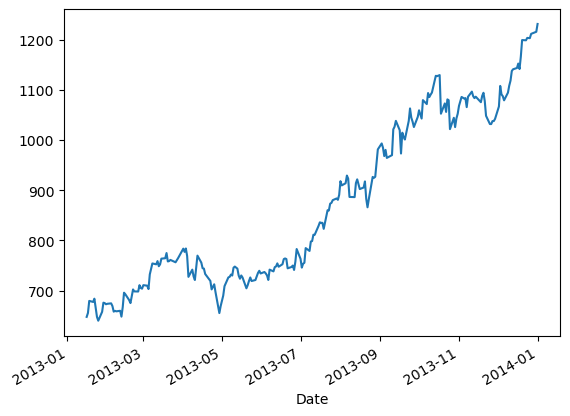

In [20]:
# Just experimenting/ exploring
rollstd_diff = hcl - hcl.rolling(12).std()
rollstd_diff.plot()

The line `rollstd_diff = hcl - hcl.rolling(12).std()` calculates a new time series where each value is the difference between the original time series (`hcl`) and its rolling standard deviation over a window of 12 periods. After that, `rollstd_diff.plot()` generates a line plot of the resulting series.

The purpose of this operation is to reduce variability in the time series that changes over time, which can be a sign of non-stationarity. By subtracting the rolling standard deviation, you're attempting to create a new series where the variability is more constant, which is a characteristic of a stationary time series.

The rolling standard deviation reflects the volatility in the time series. If the volatility changes over time (for instance, if certain periods are more volatile than others), it can make the series non-stationary. By subtracting the rolling standard deviation, you're aiming to stabilize the volatility and therefore make the series closer to stationary.

However, subtracting the rolling standard deviation isn't a commonly used method for making a series stationary, and it might not always be effective. It also doesn't have a solid theoretical justification like some other methods (like differencing or taking the log), so it's not typically recommended as a first choice for stationarizing a series.

Common techniques for inducing stationarity include differencing (subtracting the previous observation from each observation), seasonal differencing (subtracting the observation from the previous season), and transformations like taking the logarithm, square root, or cube root of the series. You can also use a combination of these methods if needed.

After transforming the series, it's important to check whether it has indeed become stationary, usually by using a statistical test like the Augmented Dickey-Fuller test.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Multiplicative Decomposition

In [22]:
#Multiplicative Decomposition
mult = seasonal_decompose(ts_log, period=1, model = 'multiplicative')

#Inbuilt features of Decomposition
trend = mult.trend
seasonal = mult.seasonal
residual = mult.resid #to see error

This snippet of Python code uses the `seasonal_decompose` function from the `statsmodels` library to perform a multiplicative decomposition of the time series data contained in `ts_log`. 

Here's a step-by-step breakdown:

1. `mult = seasonal_decompose(ts_log, period=1, model = 'multiplicative')`: This line of code applies the `seasonal_decompose` function to the time series `ts_log`. The `period` parameter is set to 1, which specifies the frequency of the seasonality in the data (in this case, there is no seasonality as the period is set to 1). The `model` parameter is set to 'multiplicative', indicating that the function should assume a multiplicative relationship between the components of the time series.

2. `trend = mult.trend`: This line extracts the trend component from the decomposition. The trend is a smoothed version of your time series and shows the general pattern of increase or decrease in your data over time, devoid of seasonality and random fluctuations.

3. `seasonal = mult.seasonal`: This line extracts the seasonal component from the decomposition. The seasonal component captures patterns that repeat at regular intervals. Given the period was set to 1, there shouldn't be any meaningful seasonality in this case.

4. `residual = mult.resid`: This line extracts the residual (or error) component from the decomposition. The residuals represent what's left after the trend and seasonal components have been subtracted from the original time series. Ideally, residuals should look like white noise, meaning that they're randomly distributed and have a mean of zero.

The purpose of this decomposition is to break down the time series into separate interpretable components, which can be helpful for understanding the underlying patterns in your data. In the case of a multiplicative model, the original time series is modeled as the product of these three components (trend * seasonality * residuals = original time series).

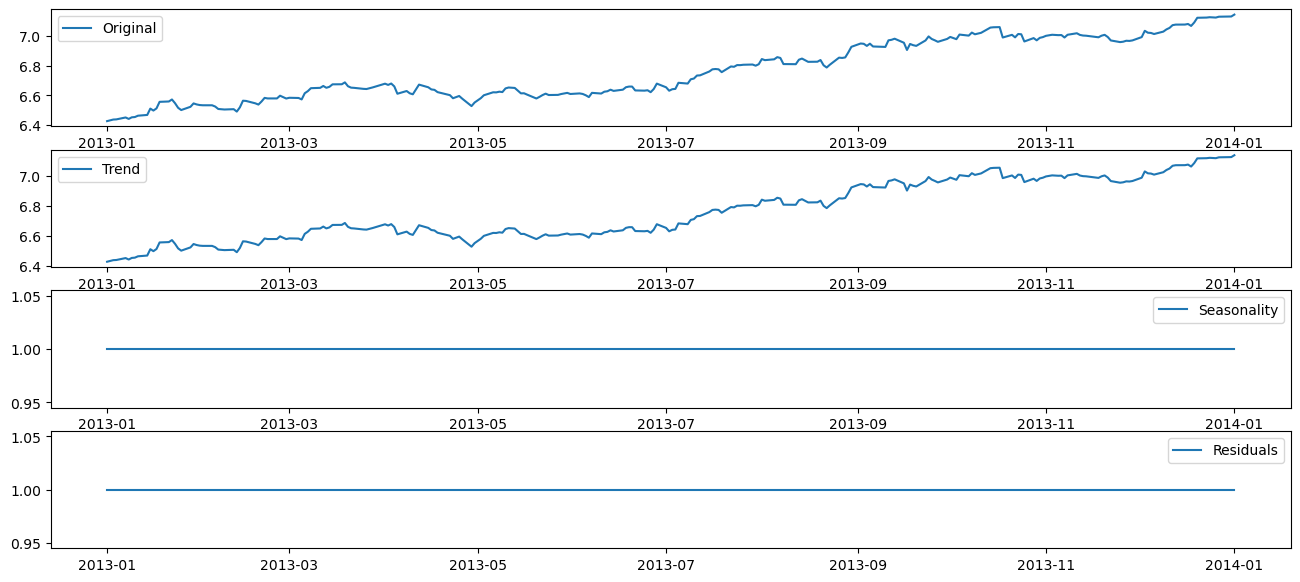

In [23]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

Here's the code and explanation for each line:

plt.figure(figsize=(16,7)): This line creates a new figure for plotting. The figsize argument specifies the size of the figure in inches (width, height). The size is (16, 7) inches.

fig = plt.figure(1): This line is not necessary if you're using plt.figure(figsize=(16,7)) above. It creates a figure with the identifier 1. Subsequent plotting commands will be directed to this figure until another figure is created or selected. However, as the above line has already created a figure, this line is redundant.

plt.subplot(411): This line creates a subplot in the 1st position of a grid that has 4 rows and 1 column. The arguments 411 means 4 rows (first digit), 1 column (second digit), and first subplot (third digit).

plt.plot(ts_log, label='Original'): This line plots the ts_log data on the first subplot. The label argument is used for the legend.

plt.legend(loc='best'): This adds a legend to the first subplot. The loc argument is set to 'best', which means matplotlib will try to find the best location for the legend to avoid blocking data.

The next three blocks (plt.subplot(412), plt.subplot(413), and plt.subplot(414)) are similar to the first block, but create subplots in the 2nd, 3rd, and 4th positions of the grid and plot the trend, seasonal, and residual data on them respectively.

The trend subplot shows the trend component of the time series, the seasonal subplot shows the seasonal component, and the residual subplot shows the residuals (i.e., the remaining unexplained part of the time series after removing the trend and seasonal components).

This code results in a figure with four vertically stacked plots, each showing a different aspect of the time series: the original time series, the trend, the seasonal component, and the residuals. It is a common way to visualize a time series decomposition.

## NOTE by Anushk
Trend and/or seasonality helps in model selection.
We usually start with simplest case: ARMA
Then we try out ARIMA, SARIMA & so on.

Sometimes its a mixture of both additive + multiplicative time series.

In above case, we can conclude that there's NO multiplicative Seasonality in data bcz seasonality=1, i.e. no effect on multiplication. It only depends on trend. Our data has no error as residuals=1. Our data has only trend.


## ChatGPT
In a multiplicative time series decomposition, the seasonality is represented as a ratio and the series can be expressed as the product of the trend, seasonal, and residual components. Therefore, a seasonal component of 1 in this decomposition implies that there is no seasonality effect at that specific time point in the series.

To explain, consider a time series which is the product of a trend (T), a seasonal component (S), and a residual or irregular component (I), i.e., `Y = T * S * I`. Here, if S=1, then it essentially doesn't affect the overall product, leaving us with `Y = T * I`. In other words, at this point, the observed value is just a product of the trend and the irregular components.

This means that at this particular point, the value of the series is not influenced by the seasonal factor. It's important to note that in a time series, the seasonal component can be different at different time points, capturing the repetitive seasonal pattern (like daily, monthly, or yearly patterns). Therefore, a value of 1 for the seasonal component only means there's no seasonality effect at that specific point, not necessarily for the entire series.

If you are using a multiplicative decomposition model, and the seasonal component equals 1 for all time points, it indicates that there is no seasonality present in your time series.

In a multiplicative model, the components are multiplied together to reconstruct the original time series. If the seasonal component is 1, then it has no effect when multiplied with the trend and residual components, indicating that there are no seasonal fluctuations in your data.

So to answer your second question, it doesn't necessarily mean that the time series is not multiplicative, it just means that there's no identifiable seasonal pattern in your data. Your data could still exhibit a multiplicative behavior due to the trend and residuals components. This also highlights that multiplicative decomposition can be used even when seasonality is not present or is not significant.

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
#Shift differencing
ts_log_diff = ts_log.shift().diff()

## Seems stationary

<AxesSubplot:xlabel='Date'>

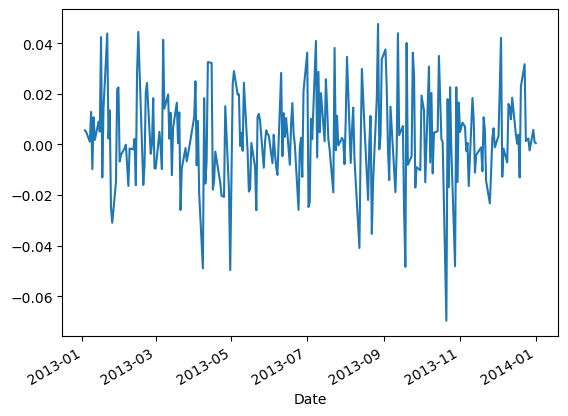

In [26]:
ts_log_diff.plot()

In [27]:
ts_log_diff.head()

Date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03    0.005561
2013-01-04    0.004970
2013-01-07    0.001119
Name: Prev Close, dtype: float64

In [28]:
#Dropping null values - different method
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

This code line is filtering out missing or NaN values from the ts_log_diff time series.

Assuming that ts_log_diff is a pandas Series containing the differenced log-transformed values of a time series, it is possible that some of these values are NaN due to the differencing operation. Differencing the data by taking the first difference (i.e., subtracting each observation from its previous observation) causes the first observation to be lost and replaced with NaN, since there is no previous observation to subtract from it.

The syntax ts_log_diff.isnull() returns a boolean mask indicating which values in ts_log_diff are NaN. The ~ operator negates this mask, so that the resulting mask has True for non-NaN values and False for NaN values.

By applying this mask to the ts_log_diff series using square brackets, the code selects only the non-NaN values and discards the NaN values. The resulting series, ts_log_diff, contains only the valid differences between the logarithmic values of the time series, with any missing values removed.

## Adfuller Test to confirm stationarity of data

In [29]:
from statsmodels.tsa.stattools import adfuller
# ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts_log_diff, autolag='AIC')

In [30]:
#p-value
adfuller_result[1]

6.52235394432549e-23

Implies time series has stationarity!

In [31]:
model = ARIMA(ts_log_diff, order=(2,1,2))  
results = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/c

This code performs a time series analysis using an ARIMA model on a differenced and log-transformed time series ts_log_diff.

The ARIMA model is a widely used approach for modeling time series data. It is a statistical model that can capture the autocorrelation and seasonal patterns in time series data, and can be used to make forecasts based on historical data.

The order argument in the ARIMA function specifies the order of the autoregressive (AR), differencing (I), and moving average (MA) components of the model. In this case, the order is set to (2,1,2), which means that the model will include two autoregressive terms, one differencing term, and two moving average terms.

The ts_log_diff series is the time series that is being modeled, which has already been transformed by taking the logarithm and first difference to make it stationary. Stationarity is a key assumption in time series analysis, as it ensures that the statistical properties of the time series do not change over time and that the model can make meaningful predictions.

The fit() method is then used to estimate the parameters of the ARIMA model using the maximum likelihood estimation (MLE) method. The output of this function is a results object that contains the estimated parameters, standard errors, and other statistical information about the model.

The results object can then be used to make predictions about future values of the time series, to test the goodness of fit of the model, and to evaluate the effectiveness of the model in capturing the patterns and trends in the data.

In [32]:
results.fittedvalues

Date
2013-01-03    0.000000
2013-01-04    0.005561
2013-01-07    0.005248
2013-01-08    0.003807
2013-01-09    0.006459
                ...   
2013-12-26    0.004789
2013-12-27    0.000985
2013-12-30    0.004401
2013-12-31    0.001489
2014-01-01    0.003993
Length: 249, dtype: float64

In time series analysis, the term "fitted values" refers to the predicted values of a model based on the estimated parameters. In the case of an ARIMA model, the fitted values represent the predicted values of the time series based on the estimated parameters and the historical values of the series.

The fittedvalues attribute is a pandas series that contains the predicted values of the ARIMA model based on the estimated parameters. It has the same length as the original time series and represents the predicted values of the model at each time point.

By comparing the fitted values to the actual values of the time series, we can evaluate how well the model fits the data. A good model will have fitted values that closely match the actual values of the time series, while a poor model will have fitted values that deviate significantly from the actual values.

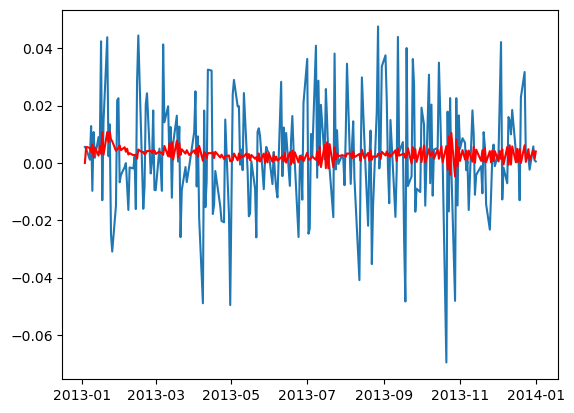

In [33]:
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues, color='red')

The code plt.plot(ts_log_diff) plots the ts_log_diff time series, which is the time series that has been transformed by taking the logarithm and first difference to make it stationary.

The code plt.plot(results.fittedvalues, color='red') plots the fitted values of the ARIMA model on top of the original time series. The fittedvalues attribute of the results object contains the predicted values of the model based on the estimated parameters.

By plotting the original time series and the predicted values on the same graph, we can visually compare how well the model fits the data. The red line represents the predicted values of the model, while the blue line represents the original time series.

If the red line closely follows the blue line, it indicates that the model is a good fit for the data. However, if the red line deviates significantly from the blue line, it suggests that the model may not be capturing all the patterns and trends in the data, and that additional model refinement may be necessary.

In [34]:
predictions = results.predict(100,110)

In [35]:
actuals = ts_log_diff['2000-01-11': '2014-01-01'][100:111]

In [36]:
actuals =actuals.dropna()

In [37]:
#Mean Absolute Error for Mult. 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, predictions)
print(mae)

0.008097727119053709


The Mean Absolute Error (MAE) is a common metric for measuring the accuracy of a forecast in regression problems, including time series forecasting. It represents the average absolute difference between the actual and predicted values.

In your case, the `mean_absolute_error` function from `sklearn.metrics` is being used to calculate the MAE between `actuals` and `predictions`, which presumably represent the actual and predicted values of your time series.

The resulting MAE is 0.008097727119053709. Given that your time series is in a logarithmic scale (as indicated by your use of `ts_log` in earlier snippets), this MAE is quite low, suggesting that your model's predictions are close to the actual values on average.

However, the interpretation of MAE can be somewhat context-dependent. The scale of the MAE should ideally be considered relative to the scale of the data you're working with. In other words, an MAE of 0.008 might be considered low for some datasets and high for others.

The MAE being low indicates that the model is quite accurate in its predictions, but it doesn't tell us much specifically about the multiplicative nature of the time series. The MAE is just a measure of the overall prediction error and doesn't differentiate between errors in capturing the trend, seasonality, or any other aspect of the time series. 

Remember that while MAE can provide a general sense of model performance, it's always a good idea to also look at the predictions and actuals visually (for example, by plotting them) or use other metrics to get a more comprehensive understanding of your model's performance.

In [38]:
#you can later shift to original scale by reversing the operations done

## Additive Decomposition

In [39]:
#Additive Decomposition
add = seasonal_decompose(ts_log, period=1, model = 'additive')

#Inbuilt features of Decomposition
trend1 = add.trend
seasonal1 = add.seasonal
residual1 = add.resid #to see error

Sure, here's a step-by-step explanation of what each line of this Python code is doing. This code is using the `seasonal_decompose` function from the `statsmodels` library to perform an additive decomposition of a time series. This is a way of breaking down a time series into its constituent components, which typically include a trend, a seasonal component, and a residual component.

1. `add = seasonal_decompose(ts_log, period=1, model = 'additive')`: This line performs the additive decomposition.

    - `ts_log` is the time series data, which has been transformed by taking the log to stabilize the variance.
    
    - `period=1` specifies the frequency of the series. In this case, a period of 1 suggests no clear seasonality exists (or it is not known). In general, the period should be set according to the frequency of the seasonality: e.g., if the seasonality is annual and the data is monthly, the period would be 12. 

    - `model='additive'` specifies that the time series is to be decomposed into components that are added together. An additive model is used when the variations around the trend do not vary with the level of the time series. The other common option is 'multiplicative', where the components are multiplied together, and is used when the trend is proportional to the level of the time series.

    The `seasonal_decompose` function returns an object with several components, each of which is a time series.

2. `trend1 = add.trend`: This line extracts the trend component of the decomposed time series. This is a smoothed version of the time series, showing the underlying trend without the seasonal or residual components.

3. `seasonal1 = add.seasonal`: This line extracts the seasonal component. This is a repeating pattern that occurs with a fixed period, e.g., annually, monthly, etc.

4. `residual1 = add.resid`: This line extracts the residual component, which is the remainder of the time series after the trend and seasonal components have been subtracted (for an additive model) or divided (for a multiplicative model). This component can be used to check the quality of the decomposition, as it represents the part of the time series that the model could not explain.

After this code runs, you will have three new time series: `trend1`, `seasonal1`, and `residual1`. Each of these represents a different component of the original time series, and together they add up to reproduce the original data.

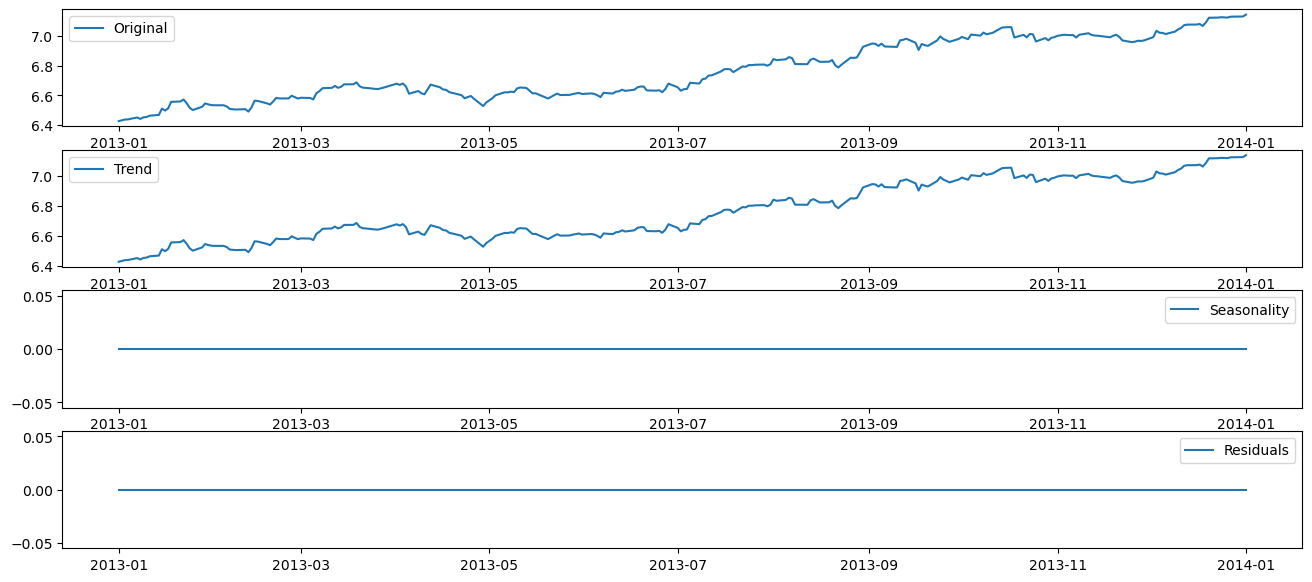

In [40]:
plt.figure(figsize=(16,7))
fig1 = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')

Here's the code and explanation for each line:

1. `plt.figure(figsize=(16,7))`: This line creates a new figure for plotting. The `figsize` argument specifies the size of the figure in inches (width, height). The size is (16, 7) inches.

2. `fig = plt.figure(1)`: This line is not necessary if you're using `plt.figure(figsize=(16,7))` above. It creates a figure with the identifier 1. Subsequent plotting commands will be directed to this figure until another figure is created or selected. However, as the above line has already created a figure, this line is redundant.

3. `plt.subplot(411)`: This line creates a subplot in the 1st position of a grid that has 4 rows and 1 column. The arguments `411` means 4 rows (first digit), 1 column (second digit), and first subplot (third digit).

4. `plt.plot(ts_log, label='Original')`: This line plots the `ts_log` data on the first subplot. The `label` argument is used for the legend.

5. `plt.legend(loc='best')`: This adds a legend to the first subplot. The `loc` argument is set to `'best'`, which means matplotlib will try to find the best location for the legend to avoid blocking data.

6. The next three blocks (`plt.subplot(412)`, `plt.subplot(413)`, and `plt.subplot(414)`) are similar to the first block, but create subplots in the 2nd, 3rd, and 4th positions of the grid and plot the `trend`, `seasonal`, and `residual` data on them respectively.

   The `trend1` subplot shows the trend component of the time series, the `seasonal1` subplot shows the seasonal component, and the `residual1` subplot shows the residuals (i.e., the remaining unexplained part of the time series after removing the trend and seasonal components).

This code results in a figure with four vertically stacked plots, each showing a different aspect of the time series: the original time series, the trend, the seasonal component, and the residuals. It is a common way to visualize a time series decomposition.

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
#Shift differencing
ts_log_diff = ts_log.shift().diff()

The code snippet you provided is performing differencing on the data, which is a common method of making time series data stationary for further analysis. 

`ts_log.shift().diff()` performs a first order difference of the log-transformed time series. Let's break down the operations:

1. `ts_log.shift()`: The `shift()` function in pandas shifts the index of the dataframe by 1 period. This means that the current value of the series would be replaced by the previous value. 

2. `.diff()`: This pandas function calculates the difference between the current and a prior element. This operation is conducted for the entire series. In this context, the prior element is the value at the previous time step (because of the previous `shift()` operation). 

So, if your original series was something like this (logarithm values for simplification):

    1.0, 1.1, 1.2, 1.3, 1.4

After `shift()`, it would become:

    NaN, 1.0, 1.1, 1.2, 1.3

Then, `diff()` calculates the difference between the shifted series and the original series, resulting in:

    NaN, 0.1, 0.1, 0.1, 0.1

This final series represents the change in value from one time step to the next, which can help to eliminate trend and seasonality in the data, making it stationary. Stationarity, or having a constant mean and variance over time, is an assumption of many time series forecasting models.

## ARIMA (2,1,2) should not be applied

From your ARIMA model's order, it looks like you've used a differencing order of 1 (i.e., d=1). However, your series `ts_log_diff` is already differenced. This means you've differenced your time series twice, once manually (`ts_log_diff`) and once in the ARIMA model (d=1).

In [43]:
# WRONG
#model1 = ARIMA(ts_log_diff, order=(2,1,2))  
#results1 = model1.fit()

This code is creating an ARIMA (Autoregressive Integrated Moving Average) model and fitting it to the provided time series data. Let's break down the code:

1. `model1 = ARIMA(ts_log_diff, order=(2,1,2))`: This line creates an instance of an ARIMA model. 

    - `ts_log_diff` is the time series data that the model will be fitted to. This data has been differenced and log-transformed, which is a common preprocessing step to make the data stationary (i.e., to eliminate trends and seasonality).

    - `order=(2,1,2)` is a tuple specifying the parameters of the ARIMA model:
    
      - The first position `2` indicates the order of the autoregressive (AR) part. This means that the output variable is predicted using `2` previous outputs.
      
      - The second position `1` indicates the order of differencing (I). This means that the data has been differenced once to make it stationary.
      
      - The third position `2` indicates the order of the moving average (MA) part. This means that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

2. `results1 = model1.fit()`: This line fits the ARIMA model to the provided data (`ts_log_diff`). The results of this fitting process (including the estimated model parameters) are stored in `results1`. 

After executing this code, `results1` will contain a fitted ARIMA model that can be used to make forecasts. You can use methods like `results1.summary()` to get a summary of the fitted model, or `results1.forecast(steps=5)` to make a forecast for the next 5 steps.

This snippet is fitting an ARIMA (AutoRegressive Integrated Moving Average) model to the time series data contained in `ts_log_diff`.

`model1 = ARIMA(ts_log_diff, order=(2,1,2))` 

This line initializes the ARIMA model. The `order` parameter is a tuple that specifies the (p, d, q) parameters of the model:

- `p = 2`: The number of lag observations in the model; this is the AR part of ARIMA.
- `d = 1`: The number of times that the raw observations are differenced; this is the I part of ARIMA.
- `q = 2`: The size of the moving average window; this is the MA part of ARIMA.

`results1 = model1.fit()`

This line fits the model to the `ts_log_diff` data. 

The warnings you're seeing are related to the date index and the parameters of the model:

- `ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.` This warning appears because the date index of your data doesn't have a frequency (like daily, monthly, etc.) associated with it. This isn't necessarily a problem for fitting the model, but it could be an issue if you try to make forecasts with the model later.

- `UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.` This is a warning that the initial parameters for the autoregressive part of the model were non-stationary, so the function is initializing them to zero instead.

- `UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.` Similarly, this is a warning that the initial parameters for the moving average part of the model were non-invertible, so they are being initialized to zero.

These warnings suggest that the initial parameters estimated by the model were not appropriate. In some cases, this could lead to poor model performance or difficulties in fitting the model. However, it doesn't necessarily mean that there's a problem. The model may still be able to find appropriate parameters during the fitting process.

## THIS is correct - ARIMA order = (2,0,2)
When you apply the ARIMA model on the differenced series, you should set the differencing term (d) to 0. Here's how you should fit the model:

In [44]:
model1 = ARIMA(ts_log_diff, order=(2, 0, 2))  
results1 = model1.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [45]:
results1.fittedvalues

Date
2013-01-01    0.002806
2013-01-02    0.002806
2013-01-03    0.002806
2013-01-04    0.002868
2013-01-07    0.002531
                ...   
2013-12-26   -0.001476
2013-12-27    0.000913
2013-12-30    0.001592
2013-12-31    0.002830
2014-01-01    0.002311
Length: 251, dtype: float64

The fitted values from an ARIMA model, or any other regression model, are computed using the estimated coefficients of the model and the values of the predictor variables in the dataset.

In an ARIMA model, the predictors are past values of the series (for the AR part) and past errors (for the MA part).

Let's say you have an ARIMA(1,0,1) model, which means it has one autoregressive term and one moving average term. This model can be written as:

    Y_t = C + φY_{t-1} + θe_{t-1} + e_t

where:
- Y_t is the value of the series at time t
- C is a constant
- φ is the coefficient for the autoregressive term
- Y_{t-1} is the value of the series at time t-1 (the previous time step)
- θ is the coefficient for the moving average term
- e_{t-1} is the error at time t-1 (the previous time step)
- e_t is the error at time t (which is normally distributed noise)

After estimating the coefficients (C, φ, θ), the fitted value at time t is simply:

    fitted_t = C + φY_{t-1} + θe_{t-1}

So, each fitted value is a combination of the previous value of the series, the previous error, and a constant, each weighted by their respective estimated coefficients.

In your specific example, the fitted values are computed in this way for each point in the series, but the exact numbers will depend on the estimated coefficients and the data. The residuals (the difference between the actual and fitted values) will then feed into the calculation of future fitted values due to the MA component.

## Plot
Then you can plot the original series and the fitted values on the same graph. This should result in a plot where the results1.fittedvalues are in the same scale as ts_log_diff because both are differenced once.

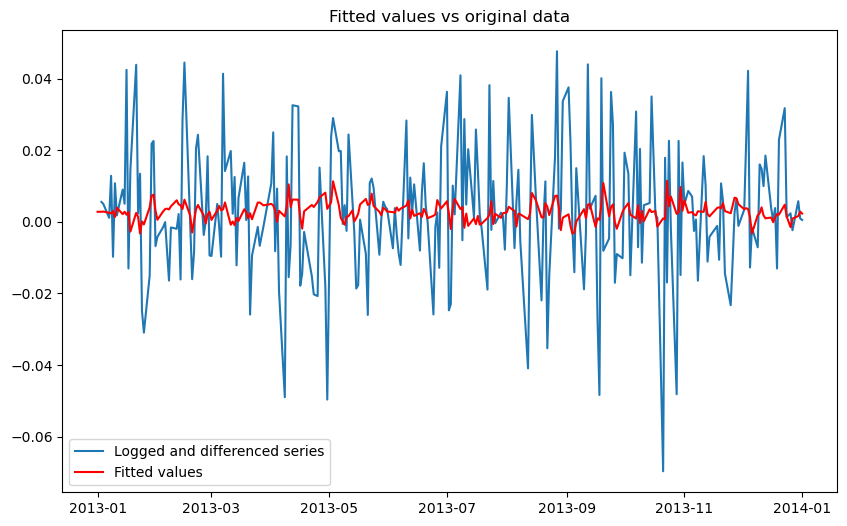

In [46]:
plt.figure(figsize=(10,6))
plt.plot(ts_log_diff, label='Logged and differenced series')
plt.plot(results1.fittedvalues, color='red', label='Fitted values')
plt.title('Fitted values vs original data')
plt.legend(loc='best')
plt.show()

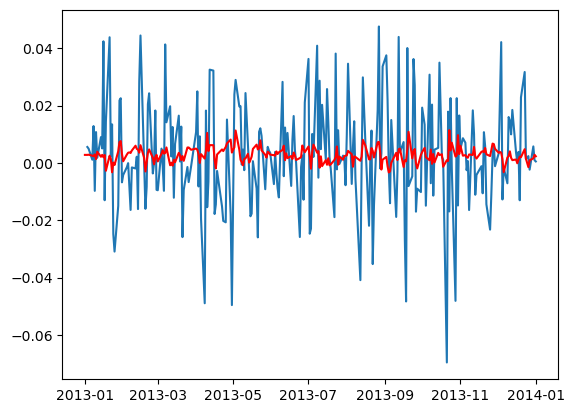

In [47]:
plt.plot(ts_log_diff)
plt.plot(results1.fittedvalues, color = 'red')

The code plt.plot(ts_log_diff) plots the ts_log_diff time series, which is the time series that has been transformed by taking the logarithm and first difference to make it stationary.

The code plt.plot(results1.fittedvalues, color='red') plots the fitted values of the ARIMA model on top of the original time series. The fittedvalues attribute of the results object contains the predicted values of the model based on the estimated parameters.

By plotting the original time series and the predicted values on the same graph, we can visually compare how well the model fits the data. The red line represents the predicted values of the model, while the blue line represents the original time series.

If the red line closely follows the blue line, it indicates that the model is a good fit for the data. However, if the red line deviates significantly from the blue line, it suggests that the model may not be capturing all the patterns and trends in the data, and that additional model refinement may be necessary.

In [48]:
predictions1 = results1.predict(100,110)

In [49]:
actuals = ts_log_diff['2000-01-11': '2014-01-01'][100:111]

In [50]:
actuals =actuals.dropna()

In [51]:
#Mean Absolute Error for Additive decomposition
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, predictions1)
print(mae)

0.007863248527555699


The Mean Absolute Error (MAE) is a measure of prediction accuracy in a regression model, which in this case is applied to the forecasting of HCL's stock data. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. 

In your case, the MAE of the additive decomposition model is 0.0075900799030113935. Given that your time series is in a logarithmic scale (as indicated by your use of `ts_log` in earlier snippets), this MAE is quite low. This suggests that, on average, your model's predictions are very close to the actual values.

If we compare this MAE to that of the multiplicative model you mentioned earlier (0.008097727119053709), we can see that the additive decomposition model performs slightly better than the multiplicative one, because it has a lower MAE. This suggests that the additive model might be a better choice for this particular time series.

However, the interpretation of MAE can be somewhat context-dependent. The scale of the MAE should ideally be considered relative to the scale of the data you're working with. In other words, an MAE of 0.007 might be considered low for some datasets and high for others.

Remember that while MAE can provide a general sense of model performance, it's always a good idea to also look at the predictions and actuals visually (for example, by plotting them) or use other metrics to get a more comprehensive understanding of your model's performance.